# First Test for EVT

In [52]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
from itertools import product

# Import functions
import backtesting as BT
import plots as IP
import expected_shortfall as ES
import evt as EVT

### Data

In [53]:
# Download data
sp500_data = yf.download("^GSPC", start="1981-01-01", end="2021-01-01")
sp500_data["Log Returns"] = np.log(sp500_data["Close"] / sp500_data["Close"].shift(1))
returns = sp500_data["Log Returns"].dropna()

[*********************100%***********************]  1 of 1 completed


### EVT

In [54]:
# Set parameters
confidence_level = 0.99 # <----- Can choose 0.95 etc

EVT VaR estimate $ (abs): 31488.45
EVT Expected Shortfall estimate $ (abs): 48582.19
Probability of exceeding 5% daily loss: 0.27%
Full Period — Violations: 94, Violation Rate: 0.93%



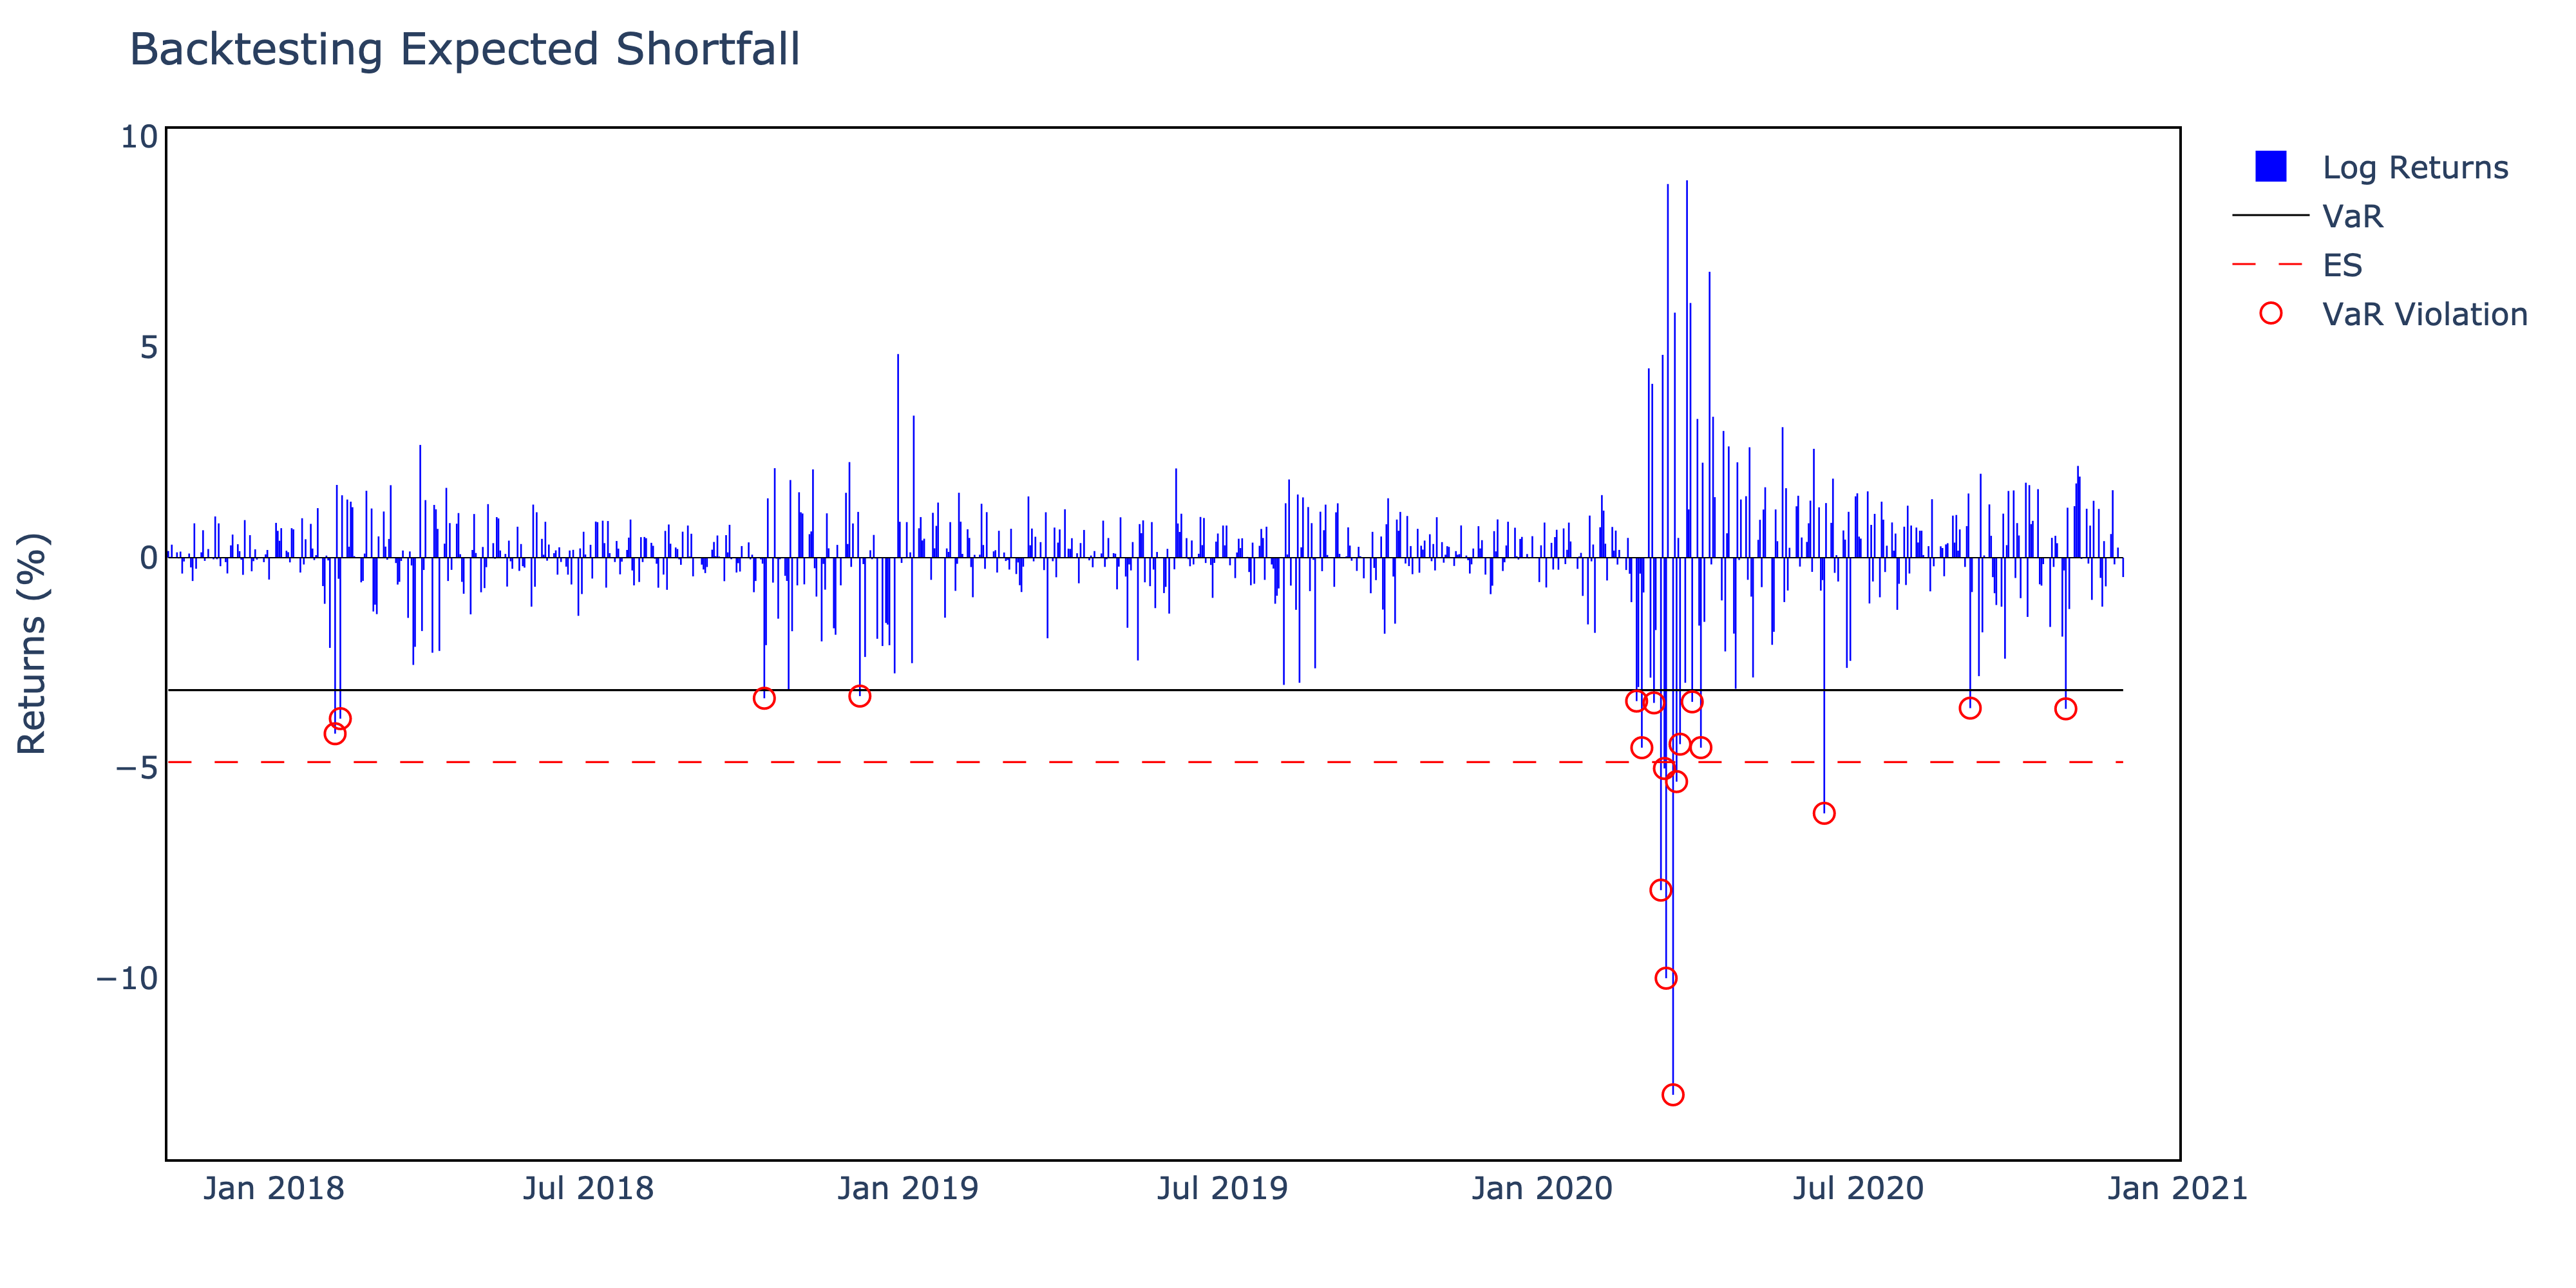

In [55]:
# Apply EVT model
evt_output, var_estimate, es_estimate, prob_exceedance = EVT.evt(
    returns=returns,
    confidence_level=confidence_level,
    threshold_percentile=97,
    exceedance_level=0.05,  # optional: probability of exceeding 5% loss
    wealth=1000000
)

# Print VaR and ES Estimates
print(f"EVT VaR estimate $ (abs): {var_estimate:.2f}")
print(f"EVT Expected Shortfall estimate $ (abs): {es_estimate:.2f}")

# If you also want the probability of exceeding 5% loss:
if prob_exceedance is not None:
    print(f"Probability of exceeding 5% daily loss: {prob_exceedance * 100:.2f}%")

# Backtest full period
violations, violation_rate = BT.backtest_var(evt_output, confidence_level)
print(f"Full Period — Violations: {violations}, Violation Rate: {violation_rate:.2f}%")

# Plot interactive VaR
fig_var = IP.plot_var(evt_output)

# Plot interactive ES for a subset
fig_es = IP.plot_es(evt_output, subset=("2017-11-01", "2020-11-30"), interactive=False)


In [56]:
evt_output.head()

,Returns,VaR,ES,VaR Violation,VaR_monetary,ES_monetary
Date,,,,,,
1981-01-05,0.011885,0.031488,0.048582,False,31488.454539,48582.185273
1981-01-06,0.001087,0.031488,0.048582,False,31488.454539,48582.185273
1981-01-07,-0.022256,0.031488,0.048582,False,31488.454539,48582.185273
1981-01-08,-0.015067,0.031488,0.048582,False,31488.454539,48582.185273
1981-01-09,0.003151,0.031488,0.048582,False,31488.454539,48582.185273


In [57]:
evt_output, var_estimate, es_estimate, prob_exceedance, diag = EVT.evt(
    returns=returns,
    confidence_level=confidence_level,
    threshold_percentile=99,
    exceedance_level=0.05,
    diagnostics=True
)

print(f"xi: {diag['xi']:.4f}, beta: {diag['beta']:.4f}")
print(f"Threshold u: {diag['threshold_u']:.4f}")
print(f"Max support (x_max): {diag['max_support']:.4f}")
print(f"Number of exceedances: {diag['num_exceedances']}")


xi: 0.3299, beta: 0.0118
Threshold u: 0.0310
Max support (x_max): inf
Number of exceedances: 101
